# AIM 511: Machine Learning Project

## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


## Data Preprocessing

In [3]:
train_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

catergorical = [
    'Education','EmploymentType','MaritalStatus','HasMortgage',
    'HasDependents','LoanPurpose','HasCoSigner'
    ]

label_encoder = LabelEncoder()

In [5]:
for col in catergorical:
    train_df[col] = label_encoder.fit_transform(train_df[col])
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0


### Dataset Split

In [6]:
from sklearn.model_selection import train_test_split
Y = train_df['Default']
X = train_df.drop(columns=['LoanID','Default'])

### Covariance Matrix

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sclar = StandardScaler()
cov = sclar.fit_transform(train_df.drop(columns=['LoanID']))
cov = pd.DataFrame(cov, columns=train_df.columns[1:])
cov_matrix = cov.cov()
cov_matrix['Default'].sort_values(ascending=False)

Default           1.000005
InterestRate      0.129885
LoanAmount        0.085519
EmploymentType    0.042670
NumCreditLines    0.028565
DTIRatio          0.018596
LoanTerm          0.000815
MaritalStatus    -0.008441
LoanPurpose      -0.010799
HasMortgage      -0.021174
Education        -0.021508
CreditScore      -0.034128
HasDependents    -0.034737
HasCoSigner      -0.040688
MonthsEmployed   -0.095430
Income           -0.100515
Age              -0.167485
Name: Default, dtype: float64

In [8]:
selected_cols = cov_matrix.columns[abs(cov_matrix['Default']) > 0.04].tolist()
if 'Default' in selected_cols:
    selected_cols.remove('Default')
selected_cols

['Age',
 'Income',
 'LoanAmount',
 'MonthsEmployed',
 'InterestRate',
 'EmploymentType',
 'HasCoSigner']

In [9]:
continuous_cols = ['Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'InterestRate']
categorical_cols = ['EmploymentType', 'HasCoSigner']

## Standardization

In [10]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X[selected_cols],Y, test_size=0.2,random_state=42)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (163421, 7)
y_train: (163421,)
x_test: (40856, 7)
y_test: (40856,)


In [12]:
x_train_scaled = x_train
x_test_scaled = x_test

### Loading Test Dataset

In [13]:
test_df = pd.read_csv('test.csv')
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes


In [14]:
loan_id = test_df['LoanID']
test_df = test_df[selected_cols]
test_df.head()

,Age,Income,LoanAmount,MonthsEmployed,InterestRate,EmploymentType,HasCoSigner
0,55,112656,92393,113,23.54,Self-employed,No
1,56,91569,131575,54,15.19,Part-time,Yes
2,26,78169,75417,105,18.02,Part-time,Yes
3,26,63033,10804,118,14.71,Part-time,Yes
4,24,29665,21182,102,15.02,Unemployed,Yes


In [15]:
for col in catergorical:
    if col in selected_cols:
        test_df[col] = label_encoder.fit_transform(test_df[col])
test_df.head()

,Age,Income,LoanAmount,MonthsEmployed,InterestRate,EmploymentType,HasCoSigner
0,55,112656,92393,113,23.54,2,0
1,56,91569,131575,54,15.19,1,1
2,26,78169,75417,105,18.02,1,1
3,26,63033,10804,118,14.71,1,1
4,24,29665,21182,102,15.02,3,1


In [16]:
from scipy.stats import skew
skewness = x_train.skew()
print(skewness)

Age               0.001521
Income           -0.000888
LoanAmount       -0.000299
MonthsEmployed   -0.003860
InterestRate      0.006796
EmploymentType    0.002329
HasCoSigner      -0.003170
dtype: float64


In [17]:
print(x_train.describe())

                 Age         Income     LoanAmount  MonthsEmployed  \
count  163421.000000  163421.000000  163421.000000   163421.000000   
mean       -0.001101       0.000276      -0.001339        0.001128   
std         0.999871       0.999679       0.999712        0.999873   
min        -1.699838      -1.733062      -1.729542       -1.717640   
25%        -0.832892      -0.862426      -0.870123       -0.851727   
50%        -0.032633      -0.001033      -0.002053        0.014186   
75%         0.834313       0.867241       0.863448        0.880099   
max         1.701260       1.732716       1.728173        1.717149   

        InterestRate  EmploymentType    HasCoSigner  
count  163421.000000   163421.000000  163421.000000  
mean       -0.001173        1.499171       0.500792  
std         1.000666        1.116912       0.500001  
min        -1.731174        0.000000       0.000000  
25%        -0.864694        1.000000       0.000000  
50%        -0.007255        1.000000       1.

In [18]:
x_train_sample = x_train_scaled[:1000]  # Take the first 1000 rows, have to replace with indices
y_train_sample = y_train[:1000]

## SVM

### SVC

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import loguniform

# Define the parameter space to search over, including different kernels
param_dist = {
    'C': loguniform(1e-3, 1e3),  # C in the range [1e-3, 1e3]
    'gamma': loguniform(1e-4, 1e1),  # gamma in the range [1e-4, 1e1]
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Including multiple kernels
}

svm_model = SVC()

# Set up RandomizedSearchCV to search over the kernels as well
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=2, verbose=2)

# Fit the model
random_search.fit(x_train_sample, y_train_sample)

# Output the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=0.1767016940294795, gamma=5.669849511478847, kernel=rbf; total time=   0.0s
[CV] END C=0.1767016940294795, gamma=5.669849511478847, kernel=rbf; total time=   0.0s
[CV] END C=0.1767016940294795, gamma=5.669849511478847, kernel=rbf; total time=   0.0s
[CV] END C=0.1767016940294795, gamma=5.669849511478847, kernel=rbf; total time=   0.0s
[CV] END C=0.1767016940294795, gamma=5.669849511478847, kernel=rbf; total time=   0.0s
[CV] END C=47.6591180868084, gamma=0.09643857615941427, kernel=poly; total time=   0.0s
[CV] END C=47.6591180868084, gamma=0.09643857615941427, kernel=poly; total time=   0.0s
[CV] END C=47.6591180868084, gamma=0.09643857615941427, kernel=poly; total time=   0.1s
[CV] END C=47.6591180868084, gamma=0.09643857615941427, kernel=poly; total time=   0.1s
[CV] END C=0.008629132190071854, gamma=0.00019517224641449495, kernel=sigmoid; total time=   0.0s
[CV] END C=0.008629132190071854, gamma=0.00019517224

In [20]:
svm_model  = random_search.best_estimator_
svm_model.fit(x_train_scaled,y_train)

SVC(C=np.float64(0.1767016940294795), gamma=np.float64(5.669849511478847))

In [21]:
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8829302917564128


### LinearSVC

In [22]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train_scaled, y_train)

# Evaluate the model
y_pred = linear_svc.predict(x_test_scaled)

print("Accuracy of Linear SVM:", accuracy_score(y_test, y_pred))

Accuracy of Linear SVM: 0.8829302917564128


### Prediction

In [23]:
test_df[continuous_cols] = scaler.transform(test_df[continuous_cols])
test_df_scaled = test_df

In [24]:
svm_pred = svm_model.predict(test_df_scaled)

In [25]:
svm_df = pd.DataFrame({
    'LoanID': loan_id,
    'Default': svm_pred
})
svm_df.to_csv('svm.csv', index=False)

In [26]:
linear_svm_pred = linear_svc.predict(test_df_scaled)

In [27]:
linear_svm_df = pd.DataFrame({
    'LoanID': loan_id,
    'Default': linear_svm_pred
})
linear_svm_df.to_csv('linear_svm.csv', index=False)

## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.metrics import Precision, Recall

Trying with class balancing

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

In [132]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(len(selected_cols),)), 
    keras.layers.Dense(400,),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(250,),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    keras.layers.Dropout(0.2),
    # keras.layers.Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dense(150,),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.01),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(1, activation="sigmoid") 
])

# optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [133]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',          
    patience=10,                  # Stop after 10 epochs with no improvement
    min_delta=0.001,
    restore_best_weights=True    
)

In [ ]:
history = model.fit(
    x_train_scaled,y_train,
    validation_data=(x_test_scaled,y_test),
    epochs=50,                     
    batch_size=32,
    # callbacks=[early_stopping]     
)

Epoch 1/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8745 - loss: 0.3437 - val_accuracy: 0.8836 - val_loss: 0.3256
Epoch 2/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8850 - loss: 0.3211 - val_accuracy: 0.8843 - val_loss: 0.3211
Epoch 3/50
3156/5107 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8847 - loss: 0.3221

Fitting with class balanced data

In [ ]:
# history = model.fit(
#     x_train_scaled,y_train,
#     # x_train_balanced, y_train_balanced,
#     validation_data=(x_test_scaled,y_test),
#     epochs=50,                     
#     batch_size=32,
#     class_weight=class_weights,
#     callbacks=[early_stopping]     
# )

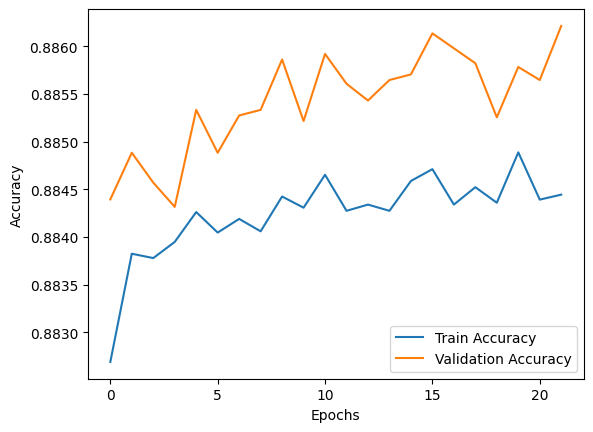

In [98]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

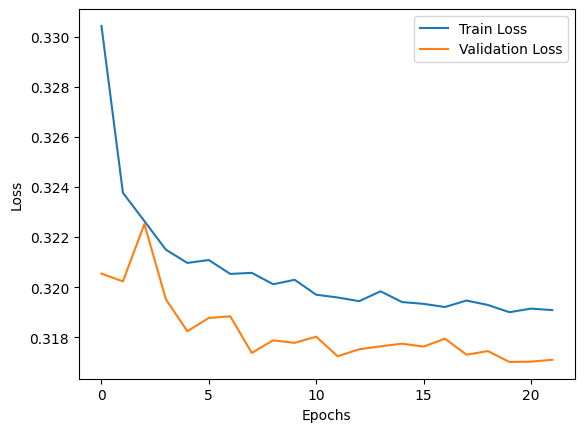

In [99]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
predictions = model.predict(test_df_scaled)

predictions =  predictions.reshape(-1)
predicted_classes = (predictions > 0.5).astype(int)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [102]:
keras_nn = pd.DataFrame({
    'LoanID': loan_id,
    'Default': predicted_classes
})
keras_nn.to_csv('keras_nn.csv', index=False)

In [105]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 400)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 250)            │       100,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 250)            │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 150)            │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,155 (1.64 MB)

 Trainable params: 142,851 (558.01 KB)

 Non-trainable params: 1,600 (6.25 KB)

 Optimizer params: 285,704 (1.09 MB)